In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import statsmodels.api as sm
from scipy import stats
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
diamond_df = pd.read_csv('diamonds.csv')
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamond_df.shape

(53940, 11)

In [ ]:
print(diamond_df['price'].mean())

3932.799721913237


In [ ]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
diamond_df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
diamond_df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
diamond_df['amount']=diamond_df['x']*diamond_df['y']*diamond_df['z']
diamond_df = diamond_df.drop(['x','y','z'], axis=1)
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,amount
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [ ]:
int_cols=['amount', 'carat', 'depth', 'table']

Checking correlating between parameters

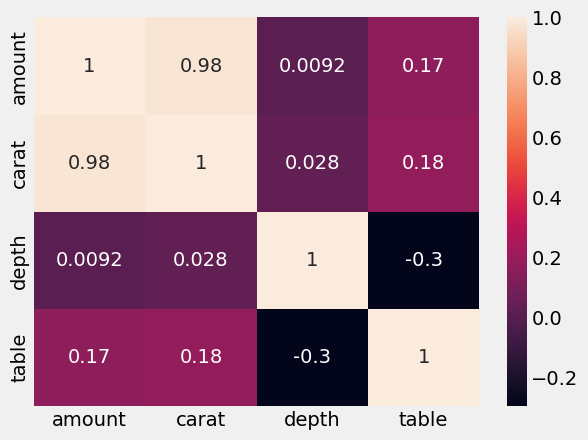

In [ ]:
hm = sns.heatmap(diamond_df[int_cols].corr(),
                 cbar=True,
                 annot=True)

"carat" and "amount" are correlated a lot, so lets drop "amount", because "carat" is modre specified for theme of dataset

Control checking of correlation in different way to be sure^

In [ ]:
from scipy.stats import pearsonr, spearmanr, kendalltau
r = spearmanr(diamond_df['carat'], diamond_df['amount'])
print('Spearman correlation:', r[0], 'p-value:', r[1])

Spearman correlation: 0.9968744897796464 p-value: 0.0


In [ ]:
diamond_df = diamond_df.drop('amount', axis=1)

Using z-score and rule 68-95-99.7 for correction of dataset outliers

In [ ]:
int_cols=['carat', 'depth', 'table']
z = stats.zscore(diamond_df[int_cols])
z.head()

,carat,depth,table
0,-1.198168,-0.174092,-1.099672
1,-1.240361,-1.360738,1.585529
2,-1.198168,-3.385019,3.375663
3,-1.071587,0.454133,0.242928
4,-1.029394,1.082358,0.242928


In [ ]:
diamond_df[(np.abs(z) > 3).any(axis = 1)].head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price
2,3,0.23,Good,E,VS1,56.9,65.0,327
91,92,0.86,Fair,E,SI2,55.1,69.0,2757
97,98,0.96,Fair,F,SI2,66.3,62.0,2759
204,205,0.98,Fair,H,SI2,67.9,60.0,2777
221,222,0.70,Good,E,VS1,57.2,62.0,2782


In [ ]:
z_mask = (np.abs(z) < 3).all(axis = 1)

diamond_df= diamond_df[z_mask]
diamond_df.shape
#Was 53940

(52574, 8)

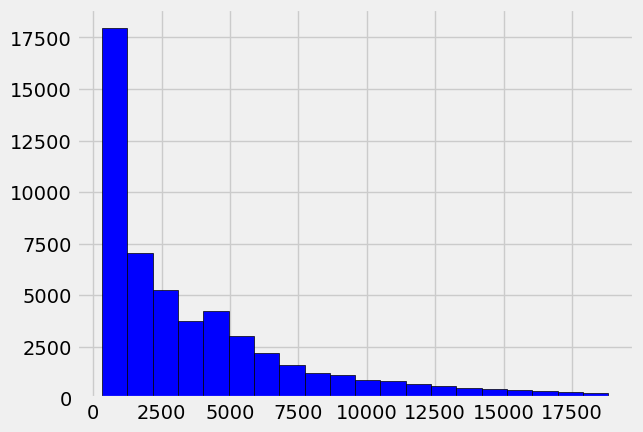

In [ ]:
plt.hist(diamond_df['price'], bins=20, color='b', edgecolor='k');

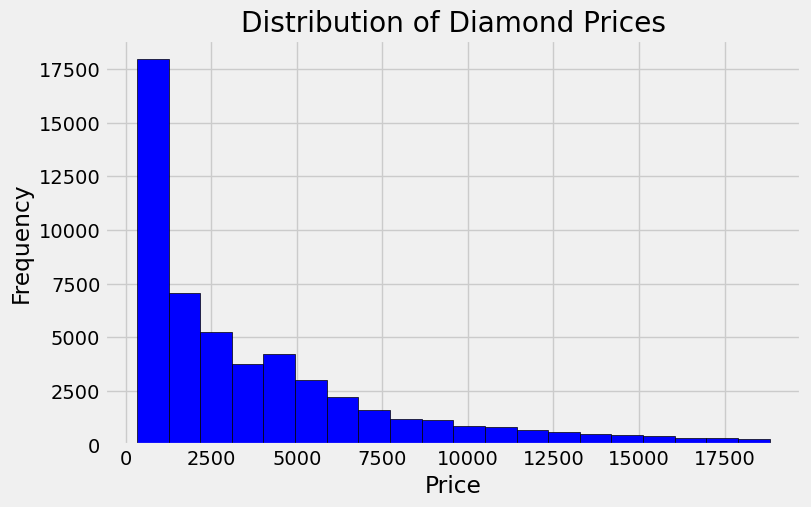

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(diamond_df['price'], bins=20, color='b', edgecolor='k');
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Prices')
plt.show()

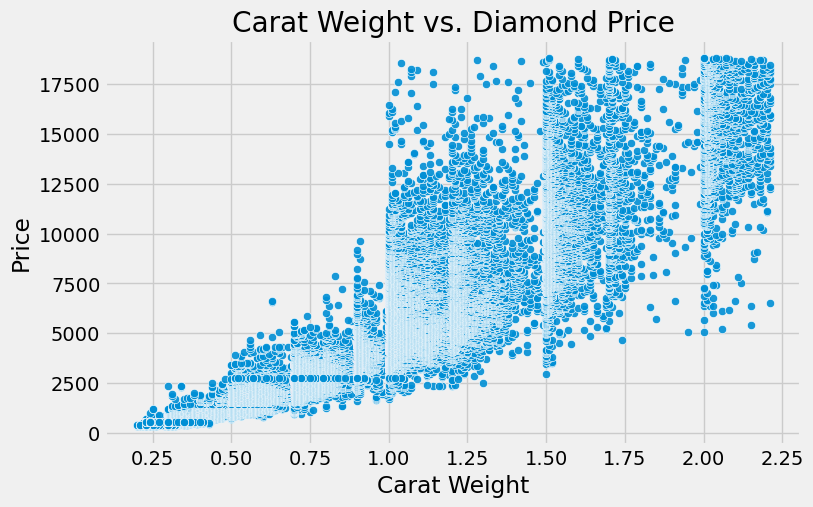

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='carat', y='price', data=diamond_df, alpha=0.9)
plt.xlabel('Carat Weight')
plt.ylabel('Price')
plt.title('Carat Weight vs. Diamond Price')
plt.show()

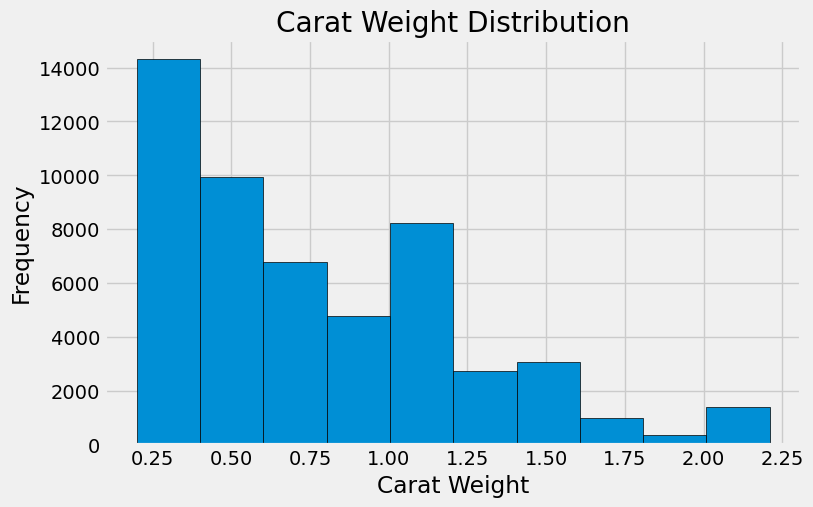

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(diamond_df['carat'], bins=10, edgecolor='k')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Carat Weight Distribution')
plt.show()

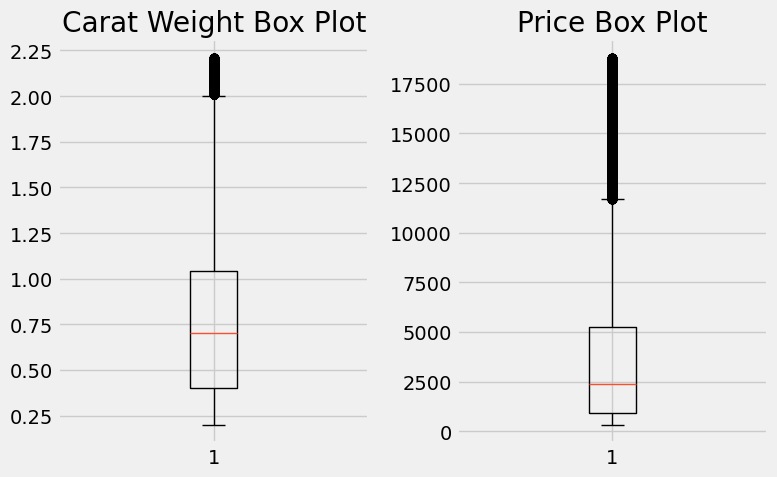

In [ ]:
plt.figure(figsize=(8,5))

plt.subplot(1, 2, 1)
plt.boxplot(diamond_df['carat'])
plt.title('Carat Weight Box Plot')

plt.subplot(1, 2, 2)
plt.boxplot(diamond_df['price'])
plt.title('Price Box Plot')

plt.tight_layout()
plt.show()

In [ ]:
cut_quality_prices = diamond_df.groupby('cut')['price'].mean()#
cut_quality_prices

cut
Fair         4262.773463
Good         3839.584709
Ideal        3391.418502
Premium      4440.863650
Very Good    3918.226011
Name: price, dtype: float64

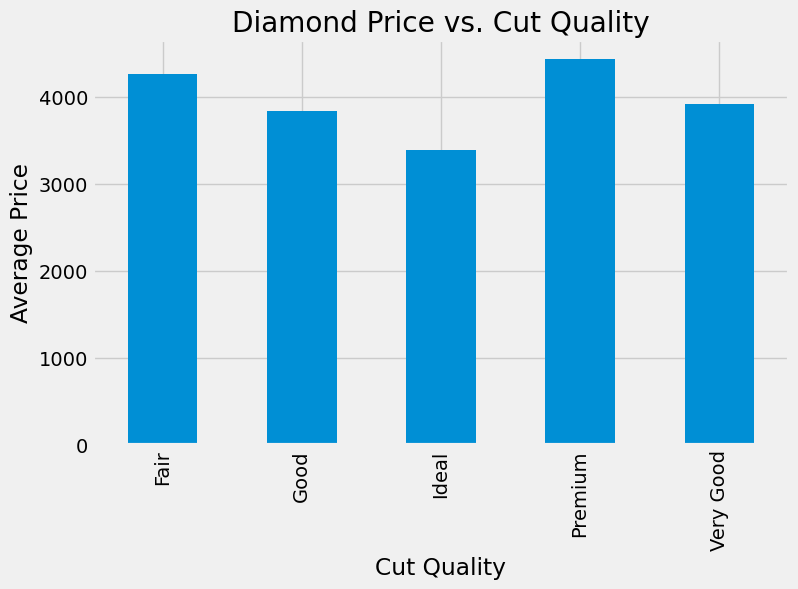

In [ ]:
plt.figure(figsize=(8,5))
cut_quality_prices.plot(kind='bar')
plt.xlabel('Cut Quality')
plt.ylabel('Average Price')
plt.title('Diamond Price vs. Cut Quality')
plt.show()

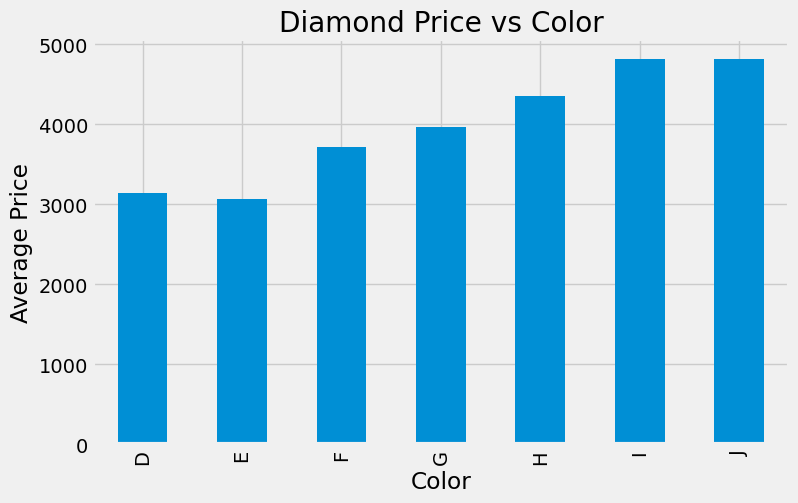

In [ ]:
color_prices = diamond_df.groupby('color')['price'].mean()

plt.figure(figsize=(8,5))
color_prices.plot(kind='bar')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.title('Diamond Price vs Color')
plt.show()

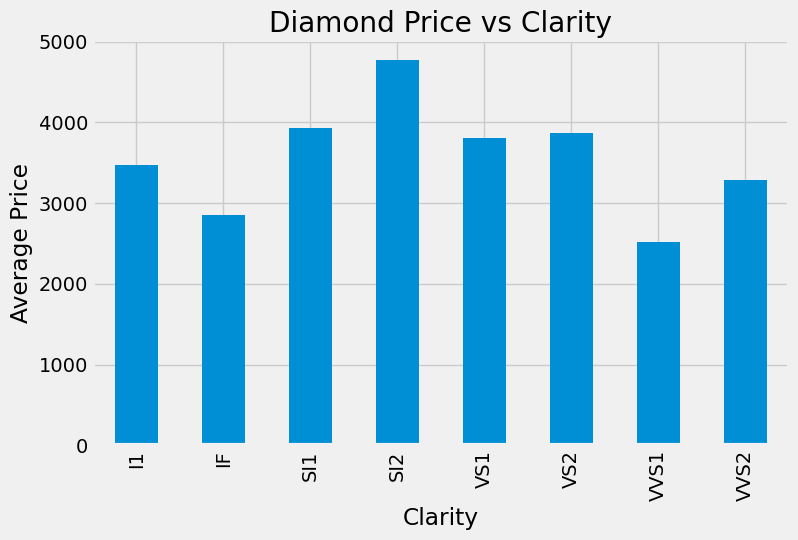

In [ ]:
clarity_prices = diamond_df.groupby('clarity')['price'].mean()
plt.figure(figsize=(8,5))
clarity_prices.plot(kind='bar')
plt.xlabel('Clarity')
plt.ylabel('Average Price')
plt.title('Diamond Price vs Clarity')
plt.show()

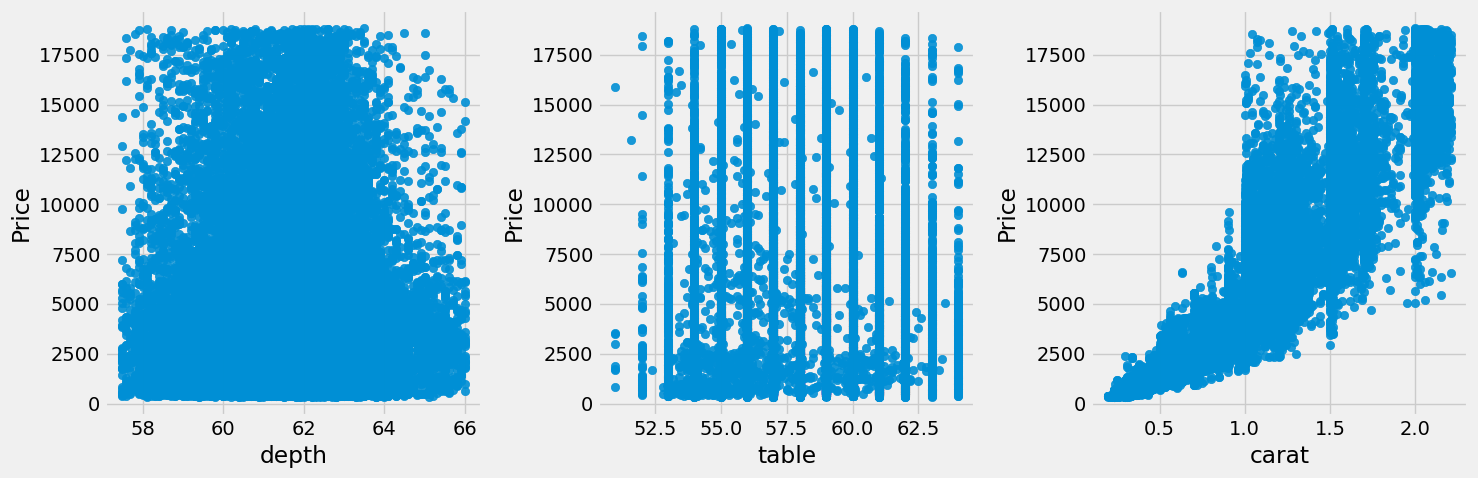

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
features = ['depth', 'table', 'carat']

for i, feature in enumerate(features):

    ax[i].scatter(diamond_df[feature], diamond_df['price'], alpha=0.9)
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

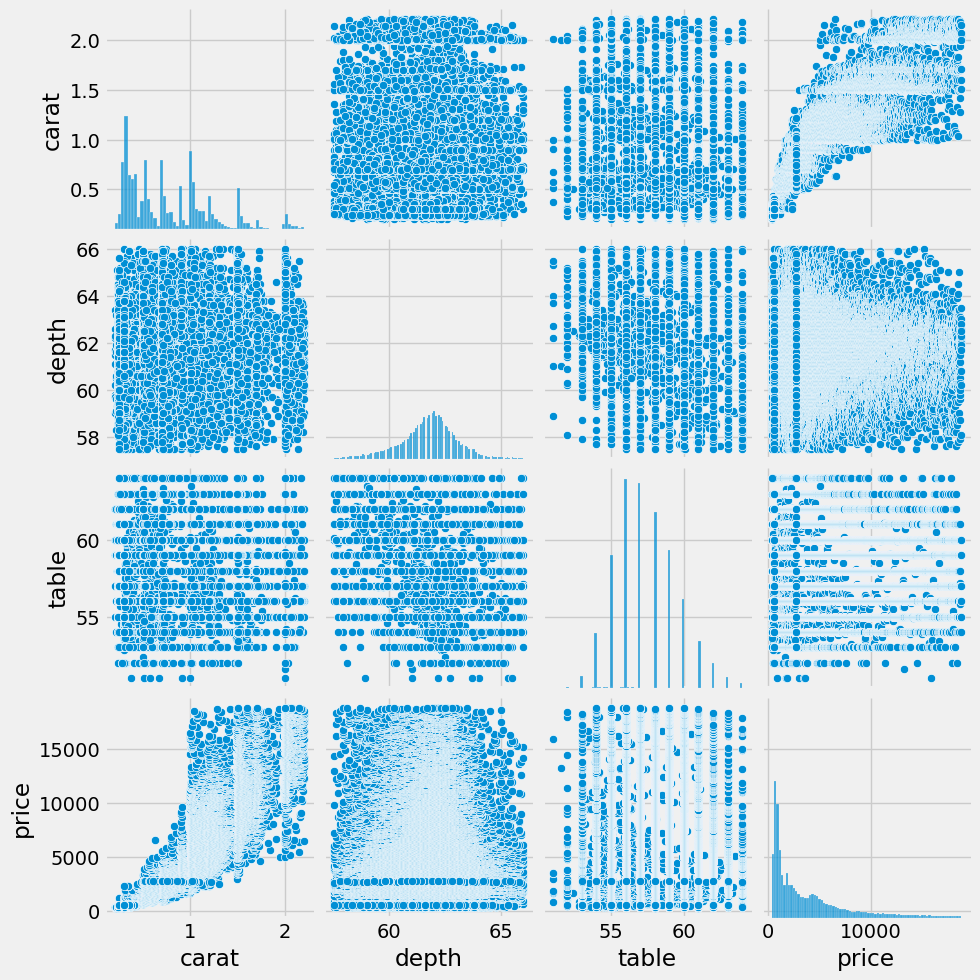

In [ ]:
sns.pairplot(diamond_df[['carat', 'depth', 'table', 'price']])
plt.show()

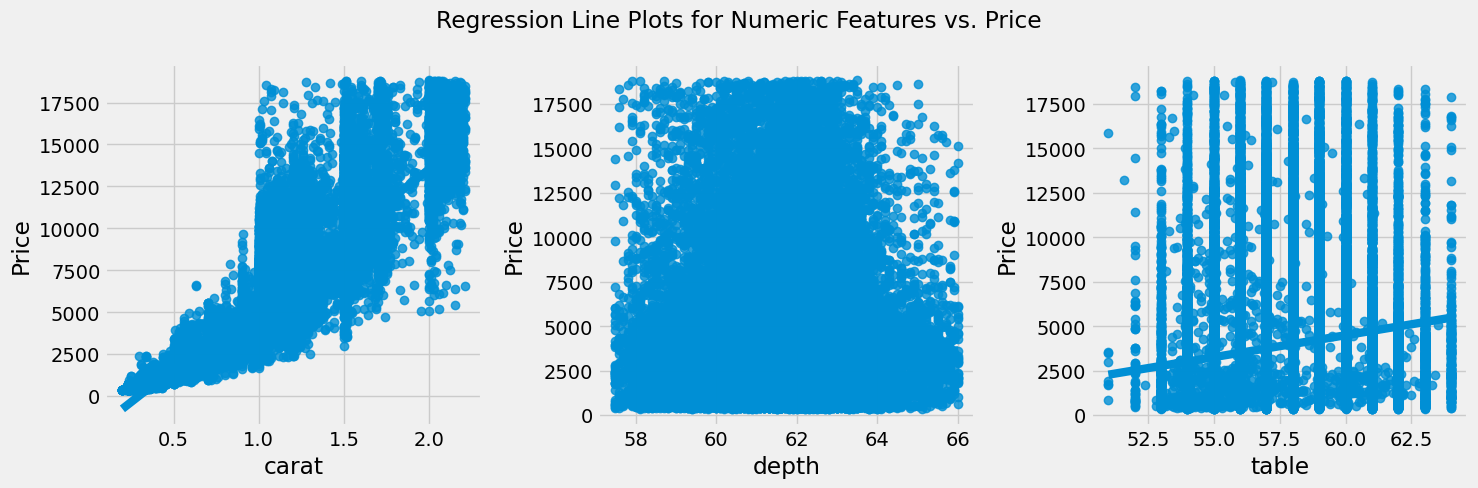

In [ ]:
numeric_features = ['carat', 'depth', 'table']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.suptitle('Regression Line Plots for Numeric Features vs. Price')

for i, feature in enumerate(numeric_features):
    sns.regplot(x=feature, y='price', data=diamond_df, ax=ax[i])
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Price')

plt.tight_layout()

plt.show()

After all of this researching, I'll conclude that depht and table make almost no sence, so it will be more profitable to drop this columns.